In [1]:
import pandas as pd
import numpy as np

In [2]:
file_path = "Combined Data.csv"  # Update path if needed
df = pd.read_csv(file_path)
print(df)
class_counts = df["status"].value_counts()

print(class_counts)

       Unnamed: 0                                          statement   status
0               0                                         oh my gosh  Anxiety
1               1  trouble sleeping, confused mind, restless hear...  Anxiety
2               2  All wrong, back off dear, forward doubt. Stay ...  Anxiety
3               3  I've shifted my focus to something else but I'...  Anxiety
4               4  I'm restless and restless, it's been a month n...  Anxiety
...           ...                                                ...      ...
53038       53038  Nobody takes me seriously I’ve (24M) dealt wit...  Anxiety
53039       53039  selfishness  "I don't feel very good, it's lik...  Anxiety
53040       53040  Is there any way to sleep better? I can't slee...  Anxiety
53041       53041  Public speaking tips? Hi, all. I have to give ...  Anxiety
53042       53042  I have really bad door anxiety! It's not about...  Anxiety

[53043 rows x 3 columns]
status
Normal                  16351
D

In [3]:
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
lemmatizer = WordNetLemmatizer()
def preprocess_and_tokenize(text):
    if not isinstance(text, str):
        text = ""

    text = re.sub(r'[^A-Za-z0-9\s]', '', text)

    tokens = word_tokenize(text.lower())

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

    return lemmatized_tokens

df['tokens'] = df['statement'].apply(preprocess_and_tokenize)

df[['statement', 'tokens']].head()

,statement,tokens
0,oh my gosh,"[oh, gosh]"
1,"trouble sleeping, confused mind, restless hear...","[trouble, sleeping, confused, mind, restless, ..."
2,"All wrong, back off dear, forward doubt. Stay ...","[wrong, back, dear, forward, doubt, stay, rest..."
3,I've shifted my focus to something else but I'...,"[ive, shifted, focus, something, else, im, sti..."
4,"I'm restless and restless, it's been a month n...","[im, restless, restless, month, boy, mean]"


In [5]:
!pip install gensim nltk

In [6]:
import gensim.downloader as api

word2vec_model = api.load('word2vec-google-news-300')

vector = word2vec_model['computer']
print(f"Vector for 'computer': {vector}")
print(f"Shape of the vector: {vector.shape}")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Vector for 'computer': [ 1.07421875e-01 -2.01171875e-01  1.23046875e-01  2.11914062e-01
 -9.13085938e-02  2.16796875e-01 -1.31835938e-01  8.30078125e-02
  2.02148438e-01  4.78515625e-02  3.66210938e-02 -2.45361328e-02
  2.39257812e-02 -1.60156250e-01 -2.61230469e-02  9.71679688e-02
 -6.34765625e-02  1.84570312e-01  1.70898438e-01 -1.63085938e-01
 -1.09375000e-01  1.49414062e-01 -4.65393066e-04  9.61914062e-02
  1.68945312e-01  2.60925293e-03  8.93554688e-02  6.49414062e-02
  3.56445312e-02 -6.93359375e-02 -1.46484375e-01 -1.21093750e-01
 -2.27539062e-01  2.45361328e-02 -1.24511719e-01 -3.18359375e-01
 -2.20703125e-01  1.30859375e-01  3.66210938e-02 -3.63769531e-02
 -1.13281250e-01  1.95312500e-01  9.76562500e-02  1.26953125e-01
  6.59179688e-02  6.93359375e-02  1.02539062e-02  1.75781250e-01
 -1.68945312e-01  1.21307373e-03 -2.98828125e-01 -1.15234375e-01
  5.66406250e-02 -1.77734375e-01 -2.08984375e

In [7]:
print(df.columns)  # Check column names
print(df.shape)  # See if dataframe has any rows
print(df['tokens'].head())  # See if tokens are present

Index(['Unnamed: 0', 'statement', 'status', 'tokens'], dtype='object')
(53043, 4)
0                                           [oh, gosh]
1    [trouble, sleeping, confused, mind, restless, ...
2    [wrong, back, dear, forward, doubt, stay, rest...
3    [ive, shifted, focus, something, else, im, sti...
4           [im, restless, restless, month, boy, mean]
Name: tokens, dtype: object


In [8]:
print("Unique status values before filtering:", df['status'].unique())

Unique status values before filtering: ['Anxiety' 'Normal' 'Depression' 'Suicidal' 'Stress' 'Bipolar'
 'Personality disorder']


In [9]:
# Ensure 'status' is a string, handle NaNs, and standardize text
df['status'] = df['status'].astype(str).fillna("").str.strip().str.capitalize()

# Apply filtering
df = df[df['status'].isin(['Depression', 'Suicidal', 'Stress', 'Anxiety', 'Bipolar', 'Personality disorder', 'Normal'])]

# Convert labels
df['status'] = df['status'].map({'Depression': 1, 'Suicidal': 1, 'Stress': 1, 'Anxiety': 1, 'Bipolar':1, 'Personality disorder':1, 'Normal': 0})

# Check the results
print(df['status'].value_counts())

status
1    36692
0    16351
Name: count, dtype: int64


In [10]:
import torch
y_train = torch.tensor(df['status'].values, dtype=torch.float32)
print("y_train tensor shape:", y_train.shape)

y_train tensor shape: torch.Size([53043])


In [11]:
import numpy as np

def get_average_word2vec(tokens, model, vector_size=300):
    if not isinstance(tokens, list):  # Ensure tokens is a list
        return np.zeros(vector_size)

    vectors = [model[word] for word in tokens if word in model]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)  # Return zero vector if no words are found

df['word2vec_vector'] = df['tokens'].apply(lambda x: get_average_word2vec(x, word2vec_model))
print(df.head())


   Unnamed: 0                                          statement  status  \
0           0                                         oh my gosh       1   
1           1  trouble sleeping, confused mind, restless hear...       1   
2           2  All wrong, back off dear, forward doubt. Stay ...       1   
3           3  I've shifted my focus to something else but I'...       1   
4           4  I'm restless and restless, it's been a month n...       1   

                                              tokens  \
0                                         [oh, gosh]   
1  [trouble, sleeping, confused, mind, restless, ...   
2  [wrong, back, dear, forward, doubt, stay, rest...   
3  [ive, shifted, focus, something, else, im, sti...   
4         [im, restless, restless, month, boy, mean]   

                                     word2vec_vector  
0  [0.024963379, 0.012084961, 0.084472656, 0.2368...  
1  [0.16476004, 0.12486049, -0.02546038, 0.077453...  
2  [0.10570611, 0.07362196, 0.021918403, 

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

In [15]:
import torch
import numpy as np

X = np.stack(df['word2vec_vector'].values)
y = df['status'].values

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.d_model = d_model
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.pe = pe.unsqueeze(0)

    def forward(self, x):
        if x.shape[-1] != self.d_model:
            raise ValueError(f"Input has wrong last dimension {x.shape[-1]}, expected {self.d_model}")
        return x + self.pe[:, :x.size(1), :].to(x.device)

class TransformerModel(nn.Module):
    def __init__(self, input_size, d_model=128, num_heads=4, num_layers=2, num_classes=1):
        super(TransformerModel, self).__init__()

        self.embedding = nn.Linear(input_size, d_model)
        self.pos_encoder = PositionalEncoding(d_model)

        encoder_layers = nn.TransformerEncoderLayer(d_model=d_model, nhead=num_heads, dim_feedforward=256, dropout=0.1, batch_first=True)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=num_layers)

        self.fc = nn.Linear(d_model, num_classes)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
      x = self.embedding(x)
      x = x.unsqueeze(1)
      x = self.pos_encoder(x)
      x = self.transformer_encoder(x)

      x = x.mean(dim=1)
      x = self.dropout(F.relu(x))
      x = torch.sigmoid(self.fc(x))
      return x


In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_size = X_train.shape[1]
model = TransformerModel(input_size=input_size).to(device)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 30

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.float().unsqueeze(1).to(device)

        optimizer.zero_grad()
        outputs = model(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        predicted = (outputs > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

        running_loss += loss.item()

    accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%")

Epoch [1/30], Loss: 0.3571, Accuracy: 86.03%
Epoch [2/30], Loss: 0.3251, Accuracy: 87.59%
Epoch [3/30], Loss: 0.3180, Accuracy: 87.78%
Epoch [4/30], Loss: 0.3148, Accuracy: 87.90%
Epoch [5/30], Loss: 0.3108, Accuracy: 88.12%
Epoch [6/30], Loss: 0.3113, Accuracy: 88.24%
Epoch [7/30], Loss: 0.3054, Accuracy: 88.24%
Epoch [8/30], Loss: 0.3028, Accuracy: 88.32%
Epoch [9/30], Loss: 0.2808, Accuracy: 89.17%
Epoch [10/30], Loss: 0.2708, Accuracy: 89.52%
Epoch [11/30], Loss: 0.2644, Accuracy: 89.82%
Epoch [12/30], Loss: 0.2554, Accuracy: 90.11%
Epoch [13/30], Loss: 0.2435, Accuracy: 90.52%
Epoch [14/30], Loss: 0.2378, Accuracy: 90.71%
Epoch [15/30], Loss: 0.2290, Accuracy: 91.02%
Epoch [16/30], Loss: 0.2237, Accuracy: 91.14%
Epoch [17/30], Loss: 0.2212, Accuracy: 91.23%
Epoch [18/30], Loss: 0.2170, Accuracy: 91.45%
Epoch [19/30], Loss: 0.2148, Accuracy: 91.44%
Epoch [20/30], Loss: 0.2130, Accuracy: 91.63%
Epoch [21/30], Loss: 0.2075, Accuracy: 91.77%
Epoch [22/30], Loss: 0.2056, Accuracy: 91.8

In [19]:
model.eval()
correct = 0
total = 0
test_loss = 0.0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.float().unsqueeze(1).to(device)

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        predicted = (outputs > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

test_accuracy = 100 * correct / total
print(f"Test Loss: {test_loss/len(test_loader):.4f}, Test Accuracy: {test_accuracy:.2f}%")


Test Loss: 0.2180, Test Accuracy: 91.14%


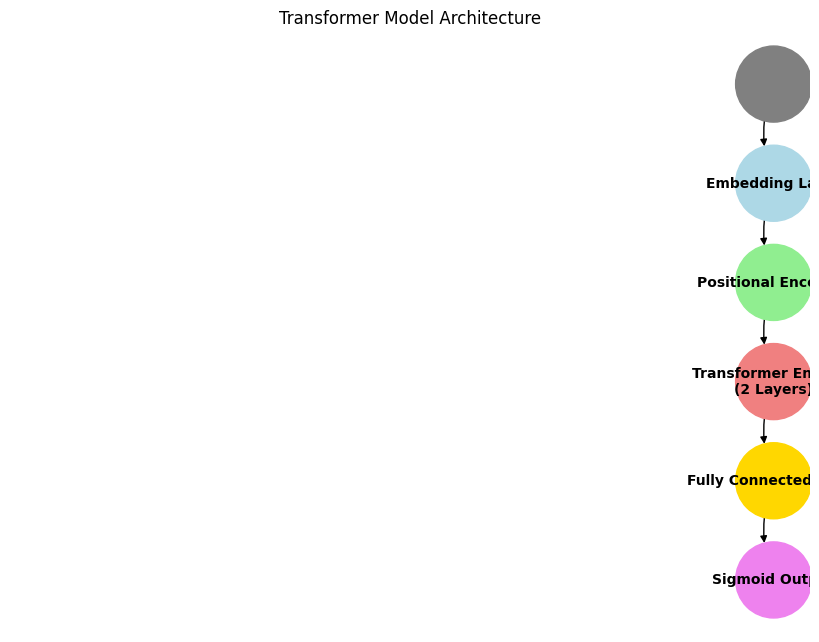

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define PositionalEncoding
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        self.d_model = d_model
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe.unsqueeze(0))

    def forward(self, x):
        if x.shape[-1] != self.d_model:
            raise ValueError(f"Input has wrong last dimension {x.shape[-1]}, expected {self.d_model}")
        return x + self.pe[:, :x.size(1), :].to(x.device)

# Define TransformerModel
class TransformerModel(nn.Module):
    def __init__(self, input_size, d_model=128, num_heads=4, num_layers=2, num_classes=1):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_size, d_model)
        self.pos_encoder = PositionalEncoding(d_model)
        encoder_layers = nn.TransformerEncoderLayer(
            d_model=d_model, nhead=num_heads, dim_feedforward=256, dropout=0.1, batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=num_layers)
        self.fc = nn.Linear(d_model, num_classes)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)  # Ensuring proper input shape
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)
        x = self.dropout(F.relu(x))
        return torch.sigmoid(self.fc(x))

# Function to visualize model architecture using NetworkX
def visualize_model(model):
    graph = nx.DiGraph()

    # Define node groups
    node_labels = {
        "Embedding": "Embedding Layer",
        "PositionalEncoding": "Positional Encoding",
        "TransformerEncoder": f"Transformer Encoder\n(2 Layers)",
        "FullyConnected": "Fully Connected Layer",
        "Output": "Sigmoid Output"
    }

    # Add nodes with labels
    graph.add_node("Model", label="Transformer Model")
    graph.add_node("Embedding", label="Embedding Layer")
    graph.add_node("PositionalEncoding", label="Positional Encoding")
    graph.add_node("TransformerEncoder", label=f"Transformer Encoder\n(2 Layers)")
    graph.add_node("FullyConnected", label="Fully Connected Layer")
    graph.add_node("Output", label="Sigmoid Output")

    # Add edges
    graph.add_edges_from([
        ("Model", "Embedding"),
        ("Embedding", "PositionalEncoding"),
        ("PositionalEncoding", "TransformerEncoder"),
        ("TransformerEncoder", "FullyConnected"),
        ("FullyConnected", "Output")
    ])

    # Define node positions using a hierarchical layout
    pos = {
        "Model": (3, 5),
        "Embedding": (3, 4),
        "PositionalEncoding": (3, 3),
        "TransformerEncoder": (3, 2),
        "FullyConnected": (3, 1),
        "Output": (3, 0),
    }

    plt.figure(figsize=(8, 6))

    # Draw nodes with color differentiation
    color_map = {
        "Embedding": "lightblue",
        "PositionalEncoding": "lightgreen",
        "TransformerEncoder": "lightcoral",
        "FullyConnected": "gold",
        "Output": "violet"
    }
    node_colors = [color_map.get(node, "gray") for node in graph.nodes()]

    nx.draw(
        graph,
        pos,
        labels=node_labels,
        with_labels=True,
        node_size=3000,
        node_color=node_colors,
        edge_color="black",
        font_size=10,
        font_weight="bold",
        arrows=True,
        connectionstyle="arc3,rad=0.2"
    )
    plt.title("Transformer Model Architecture")
    plt.show()

# Instantiate and visualize the model
input_size = 300  # Replace with actual input size
model = TransformerModel(input_size=input_size)
visualize_model(model)
